In [1]:
import pandas as pd

# Entity Matching

In [2]:
# m1 = pd.read_csv('out/matches_1.csv')
# m2 = pd.read_csv('out/matches_2.csv')
# m3 = pd.read_csv('out/matches_3.csv')
m = pd.read_csv('out_full_hf_140/out_matches.csv')

In [3]:
# print('Results with top-k = 5:')
# print('Matches 1 Accuracy:', sum(m1['n_matches_predict'] == m1['n_matches']) / m1.shape[0])
# print('Matches 2 Accuracy:', sum(m2['n_matches_predict'] == m2['n_matches']) / m2.shape[0])
# print('Matches 3 Accuracy:', sum(m3['n_matches_predict'] == m3['n_matches']) / m3.shape[0])

print('-'*20)
print('Results with greedy decoding:')
print('Accuracy:', sum(m['n_matches_predict'] == m['n_matches']) / m.shape[0])

--------------------
Results with greedy decoding:
Accuracy: 0.6357142857142857


In [4]:
# import ast

# def find_intersection(list1, list2, list3):
#     intersection = []
#     for dict1 in list1:
#         if dict1 in list2 and dict1 in list3:
#             intersection.append(dict1)
#     return intersection

# all_r = []
# for r1, r2, r3 in zip(m1['references'], m2['references'], m3['references']):
#     all_r.append(find_intersection(ast.literal_eval(r1), ast.literal_eval(r2), ast.literal_eval(r3)))
# clean_r = [r for r in all_r if len(r) > 0]
# print('Intersecting References:')
# [print(r) for r in clean_r];
# print(len(clean_r))

# print('-'*20)
# print('Intersecting Matches:')
# all_p = []
# for p1, p2, p3 in zip(m1['phrase_matches'], m2['phrase_matches'], m3['phrase_matches']):
#     all_p.append(find_intersection(ast.literal_eval(p1), ast.literal_eval(p2), ast.literal_eval(p3)))
# clean_p = [p for p in all_p if len(p) > 0]
# [print(p) for p in clean_p];
# print(len(clean_p))

# Coding

In [2]:
a1 = pd.read_csv('out_full_hf_140/out_code_1095.csv')
a2 = pd.read_csv('out_full_hf_140/out_code_2109.csv')
a3 = pd.read_csv('out_full_hf_140/out_code_2428.csv')

In [5]:
print('A1:', end='\n\n')
print('Entity Match = True & Output = Not NaN / All:\n', a1[(a1['output'].notna()) & (a1['n_matches_predict']==a1['n_matches'])].shape[0] / a1.shape[0], end='\n\n')
print('Entity Match = True & Output = Not NaN / Entity Match = True:\n', a1[(a1['output'].notna()) & (a1['n_matches_predict']==a1['n_matches'])].shape[0] / a1[(a1['n_matches_predict']==a1['n_matches'])].shape[0], end='\n\n')
print('Output = Not NaN / All:\n', a1[(a1['output'].notna())].shape[0] / a1.shape[0], end='\n\n')
print('-'*30)

print('A2:', end='\n\n')
print('Entity Match = True & Output = Not NaN / All:\n', a2[(a2['output'].notna()) & (a2['n_matches_predict']==a2['n_matches'])].shape[0] / a2.shape[0], end='\n\n')
print('Entity Match = True & Output = Not NaN / Entity Match = True:\n', a2[(a2['output'].notna()) & (a2['n_matches_predict']==a2['n_matches'])].shape[0] / a2[(a2['n_matches_predict']==a2['n_matches'])].shape[0], end='\n\n')
print('Output = Not NaN / All:\n', a2[(a2['output'].notna())].shape[0] / a2.shape[0], end='\n\n')
print('-'*30)

print('A3:', end='\n\n')
print('Entity Match = True & Output = Not NaN / All:\n', a3[(a3['output'].notna()) & (a3['n_matches_predict']==a3['n_matches'])].shape[0] / a3.shape[0], end='\n\n')
print('Entity Match = True & Output = Not NaN / Entity Match = True:\n', a3[(a3['output'].notna()) & (a3['n_matches_predict']==a3['n_matches'])].shape[0] / a3[(a3['n_matches_predict']==a3['n_matches'])].shape[0], end='\n\n')
print('Output = Not NaN / All:\n', a3[(a3['output'].notna())].shape[0] / a3.shape[0], end='\n\n')

A1:

Entity Match = True & Output = Not NaN / All:
 0.5642857142857143

Entity Match = True & Output = Not NaN / Entity Match = True:
 0.8876404494382022

Output = Not NaN / All:
 0.85

------------------------------
A2:

Entity Match = True & Output = Not NaN / All:
 0.5857142857142857

Entity Match = True & Output = Not NaN / Entity Match = True:
 0.9213483146067416

Output = Not NaN / All:
 0.8928571428571429

------------------------------
A3:

Entity Match = True & Output = Not NaN / All:
 0.55

Entity Match = True & Output = Not NaN / Entity Match = True:
 0.8651685393258427

Output = Not NaN / All:
 0.8642857142857143



### Output analysis

In [8]:
%%capture cap

a_notna = a3[a3['output'].notna()]

for i, r in a_notna.iterrows():
    print(f'**QUESTION {i}:**')
    print(r['question'], end='\n\n')
    print('**ANSWER FORMAT:**')
    print(r['answer_format'], end='\n\n')
    print('**Entity Matches:**')
    print(r['phrase_matches'], end='\n\n')
    print('**REFERENCES:**')
    print(r['references'], end='\n\n')
    print('**PLAN:**')
    print(r['plan'], end='\n\n')
    print('**CODE:**')
    print(r['code'], end='\n\n')
    print('**OUTPUT:**')
    print(r['output'], end='\n\n')
    print('-'*30, end='\n\n')
    
# Save the captured output to a text file
with open('not_na_output.txt', 'w') as file:
    file.write(cap.stdout)

In [10]:
%%capture cap

a_na = a3[a3['output'].isna()]

for i, r in a_na.iterrows():
    print(f'**QUESTION {i}:**')
    print(r['question'], end='\n\n')
    print('**ANSWER FORMAT:**')
    print(r['answer_format'], end='\n\n')
    print('**Entity Matches:**')
    print(r['phrase_matches'], end='\n\n')
    print('**REFERENCES:**')
    print(r['references'], end='\n\n')
    print('**PLAN:**')
    print(r['plan'], end='\n\n')
    print('**CODE:**')
    print(r['code'], end='\n\n')
    print('**ERROR:**')
    print(r['error_message'], end='\n\n')
    print('-'*30, end='\n\n')
    
# Save the captured output to a text file
with open('na_output.txt', 'w') as file:
    file.write(cap.stdout)


### Save not-na outputs

In [18]:
# a_int = a1.loc[a1.output.notna()][['question', 'code', 'output']]

# a_int['info_code'] = '-'
# a_int['info_output'] = '-'

# a_int.to_csv('out/out_info_1.csv', index=False)

# Metrics

In [2]:
import re

def extract_content(text):
    # Use a regular expression to find content between [[ and ]]
    match = re.search(r'\[\[(.*?)\]\]', text)
    if match:
        # Return the content as a string
        return match.group(1).lower()
    else:
        # Return None if no match is found
        return None
    
def extract_number(text):
    # Use a regular expression to find a number between [[ and ]]
    match = re.findall(r'\[\[(\d+)\]\]', text)
    if match:
        # Return the number as an integer
        return int(match[-1])
    else:
        # Return None if no match is found
        return None

In [3]:
# combinations = [
#     [1095, 2109, 2428],
#     [1095, 2109, 2455], # 1
#     [1095, 2109, 8610],
#     [1095, 2428, 2455], # --
#     [1095, 2428, 8610],
#     [1095, 2455, 8610],
#     [2109, 2428, 2455],
#     [2109, 2428, 8610],
#     [2109, 2455, 8610],
#     [2428, 2455, 8610]  # --
# ]

# openai - [1131, 2352, 3158]
# full - [1095, 2109, 2455]
# no_entity - [1048, 7463, 2705]
# no_reference - [2559, 3032, 2798]

In [3]:
import pandas as pd

results = pd.read_csv('data/questions_140.csv')[['id', 'question', 'category', 'answer_format', 'n_matches', 'entity_match']]

i1 = pd.read_csv('out_no_reference/out_info_2559.csv')
i2 = pd.read_csv('out_no_reference/out_info_3032.csv')
i3 = pd.read_csv('out_no_reference/out_info_2798.csv')

i1 = i1[i1['output'].notna()]
i2 = i2[i2['output'].notna()]
i3 = i3[i3['output'].notna()]

i1 = i1[i1['info_output'].notna()]
i2 = i2[i2['info_output'].notna()]
i3 = i3[i3['info_output'].notna()]

print(i1.shape, i2.shape, i3.shape)

(130, 17) (57, 17) (130, 17)


### Evaluation Metrics

In [4]:
# output extraction
i1['code_out_1'] = i1['output'].apply(extract_content)
i1.loc[(i1['code_out_1']=='nan') & (i1['answer_format']=='yes or no'), 'code_out_1'] = 'no'
i1.loc[(i1['code_out_1']=='nan') & (i1['answer_format']=='a single number'), 'code_out_1'] = '0'
i1.drop(i1[(i1['code_out_1'] == 'nan') & (i1['answer_format'] == 'a single entity name')].index, inplace=True)

i2['code_out_2'] = i2['output'].apply(extract_content)
i2.loc[(i2['code_out_2']=='nan') & (i2['answer_format']=='yes or no'), 'code_out_2'] = 'no'
i2.loc[(i2['code_out_2']=='nan') & (i2['answer_format']=='a single number'), 'code_out_2'] = '0'
i2.drop(i2[(i2['code_out_2'] == 'nan') & (i2['answer_format'] == 'a single entity name')].index, inplace=True)

i3['code_out_3'] = i3['output'].apply(extract_content)
i3.loc[(i3['code_out_3']=='nan') & (i3['answer_format']=='yes or no'), 'code_out_3'] = 'no'
i3.loc[(i3['code_out_3']=='nan') & (i3['answer_format']=='a single number'), 'code_out_3'] = '0'
i3.drop(i3[(i3['code_out_3'] == 'nan') & (i3['answer_format'] == 'a single entity name')].index, inplace=True)

i1['info_out_1'] = i1['info_output'].apply(extract_number)
i2['info_out_2'] = i2['info_output'].apply(extract_number)
i3['info_out_3'] = i3['info_output'].apply(extract_number)

results = pd.merge(results, i1[['id', 'code_out_1', 'info_out_1']], on='id', how='left')
results = pd.merge(results, i2[['id', 'code_out_2', 'info_out_2']], on='id', how='left')
results = pd.merge(results, i3[['id', 'code_out_3', 'info_out_3']], on='id', how='left')

# success rate
results['success_1'] = 0
results.loc[results['code_out_1'].notna() | results['code_out_2'].notna() | results['code_out_3'].notna(), 'success_1'] = 1

results['success_3'] = 0
results.loc[results['code_out_1'].notna() & results['code_out_2'].notna() & results['code_out_3'].notna(), 'success_3'] = 1

# consistency score
results['consistency_2'] = 0
results.loc[(results['success_1'] == 1) & ((results['code_out_1'] == results['code_out_2']) | (results['code_out_1'] == results['code_out_3']) | (results['code_out_3'] == results['code_out_2'])), 'consistency_2'] = 1

results['consistency_3'] = 0
results.loc[(results['success_3'] == 1) & (results['code_out_1'] == results['code_out_2']) & (results['code_out_1'] == results['code_out_3']), 'consistency_3'] = 1

# information gain
results['info_gain_2_2'] = 0
results.loc[(results['consistency_2'] == 1) & (((results['info_out_1'] == results['info_out_2']) & ((results['code_out_1'] == results['code_out_2']))) | 
                                               ((results['info_out_2'] == results['info_out_3']) & ((results['code_out_2'] == results['code_out_3']))) | 
                                               ((results['info_out_1'] == results['info_out_3']) & ((results['code_out_1'] == results['code_out_3'])))), 'info_gain_2_2'] = 1

results['info_gain_3_2'] = 0
results.loc[(results['consistency_3'] == 1) & ((results['info_out_1'] == results['info_out_2']) | (results['info_out_2'] == results['info_out_3']) | (results['info_out_1'] == results['info_out_3'])), 'info_gain_3_2'] = 1

results['info_gain_3_3'] = 0
results.loc[(results['consistency_3'] == 1) & (results['info_out_1'] == results['info_out_2']) & (results['info_out_2'] == results['info_out_3']), 'info_gain_3_3'] = 1

# select questions that requires entity look up
results['requires_landmark_look_up'] = False
results.loc[(results['n_matches'] > 0) & (results['entity_match'] == 0), 'requires_landmark_look_up'] = True

results['requires_entity_look_up'] = results['entity_match'] == 1

# compute all metrics
metrics = ['success_1', 'success_3', 'consistency_2', 'consistency_3', 'info_gain_3_3', 'info_gain_3_2', 'info_gain_2_2']
metrics_rename = {
    'success_1': "Success Rate (at least 1 seed)", 
    'success_3': "Success Rate (all 3 seeds)",
    'consistency_2': "Consistency (at least 2 seeds)", 
    'consistency_3': "Consistency (all 3 seeds)", 
    'info_gain_3_3': "Info Gain (Consistency 3 + Info Gain 3)", 
    'info_gain_3_2': "Info Gain (Consistency 3 + Info Gain 2)", 
    'info_gain_2_2': "Info Gain (Consistency 2 + Info Gain 2)"
}

metrics_cat = results.groupby('category')[metrics].mean().rename(metrics_rename, axis=1)
metrics_entity_look = results.groupby('requires_entity_look_up')[metrics].mean().rename(metrics_rename, axis=1)
metrics_landmark_look = results.groupby('requires_landmark_look_up')[metrics].mean().rename(metrics_rename, axis=1)
metrics_ans_form = results.groupby('answer_format')[metrics].mean().rename(metrics_rename, axis=1)

print(results[metrics].mean())

success_1        0.985714
success_3        0.314286
consistency_2    0.457143
consistency_3    0.128571
info_gain_3_3    0.078571
info_gain_3_2    0.121429
info_gain_2_2    0.264286
dtype: float64


In [5]:
results[['id', 'question', 'category', 'answer_format', 'requires_landmark_look_up', 'requires_entity_look_up', 'code_out_1', 'code_out_2', 'code_out_3', 'info_out_1', 'info_out_2', 'info_out_3'] + metrics].to_excel('results.xlsx', index=False)

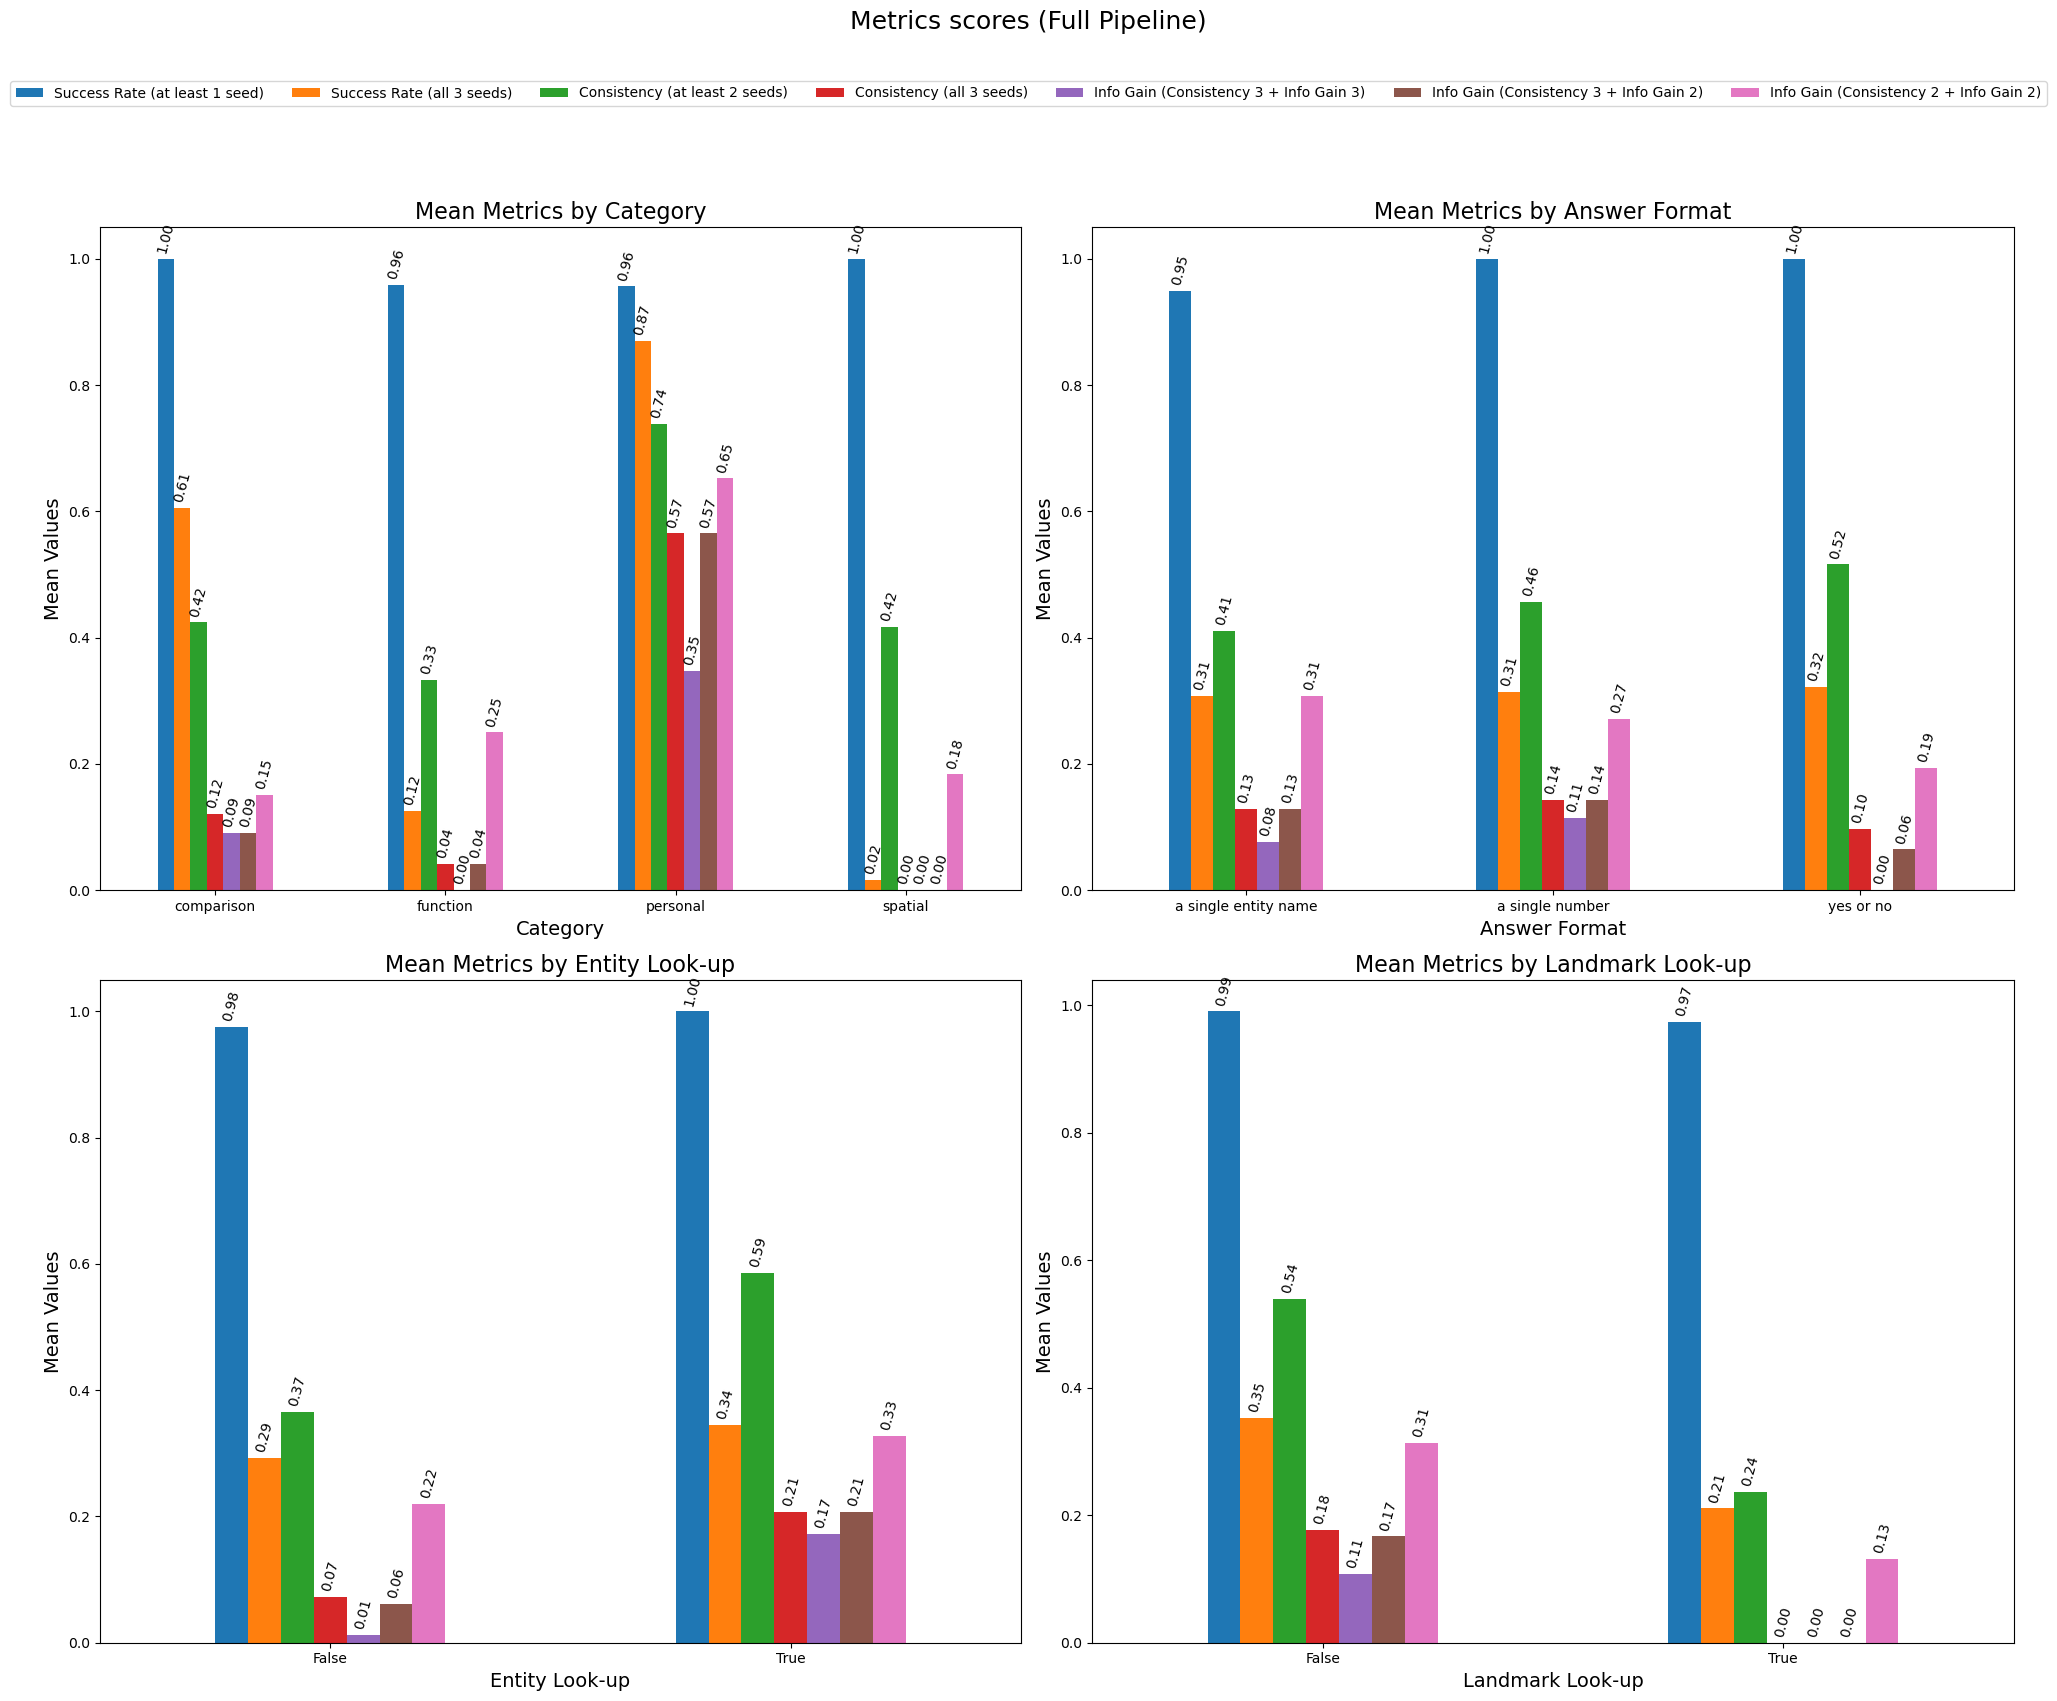

In [6]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# Plotting for metrics
metrics_cat.plot(kind='bar', ax=ax1, legend=False)
ax1.set_title('Mean Metrics by Category', fontsize=16)
ax1.set_xlabel('Category', fontsize=14)
ax1.set_ylabel('Mean Values', fontsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

# Adding bar values on top of each bar for
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', rotation=75, va='center', xytext=(0, 15), textcoords='offset points')

# Plotting for metrics_ans_form
metrics_ans_form.plot(kind='bar', ax=ax2, legend=False)
ax2.set_title('Mean Metrics by Answer Format', fontsize=16)
ax2.set_xlabel('Answer Format', fontsize=14)
ax2.set_ylabel('Mean Values', fontsize=14)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)

# Adding bar values on top of each bar for metrics_ans_form
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', rotation=75, va='center', xytext=(0, 15), textcoords='offset points')

# Plotting for metrics
metrics_entity_look.plot(kind='bar', ax=ax3, legend=False)
ax3.set_title('Mean Metrics by Entity Look-up', fontsize=16)
ax3.set_xlabel('Entity Look-up', fontsize=14)
ax3.set_ylabel('Mean Values', fontsize=14)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0)

# Adding bar values on top of each bar for
for p in ax3.patches:
    ax3.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', rotation=75, va='center', xytext=(0, 15), textcoords='offset points')

# Plotting for metrics
metrics_landmark_look.plot(kind='bar', ax=ax4, legend=False)
ax4.set_title('Mean Metrics by Landmark Look-up', fontsize=16)
ax4.set_xlabel('Landmark Look-up', fontsize=14)
ax4.set_ylabel('Mean Values', fontsize=14)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=0)

# Adding bar values on top of each bar for
for p in ax4.patches:
    ax4.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', rotation=75, va='center', xytext=(0, 15), textcoords='offset points')


# Create one legend for all plots
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(labels), bbox_to_anchor=(0.5, 1.02))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Metrics scores (Full Pipeline)', fontsize=18, y=1.06)
plt.show()

In [27]:
# Information Gain Variance
info_outs = results[results['info_out_1'].notna() & results['info_out_2'].notna() & results['info_out_3'].notna()][['info_out_1', 'info_out_2', 'info_out_3']]
info_outs.reset_index(drop=True, inplace=True)

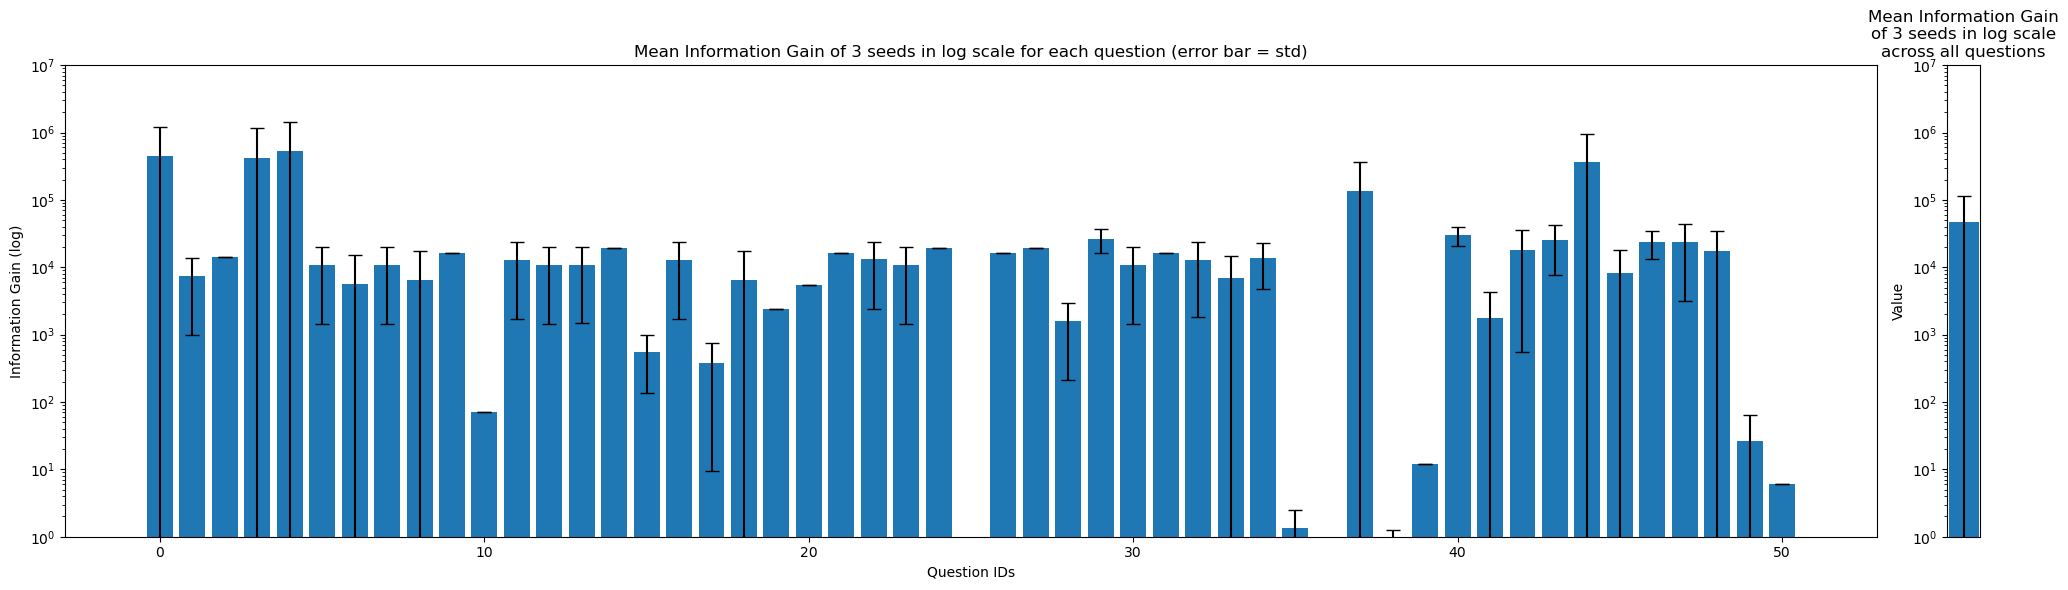

In [28]:
mean_all = info_outs.mean(axis=1)
std_all = info_outs.std(axis=1)

mean_of_means = mean_all.mean()
mean_of_stds = std_all.mean()

# Set up the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6), gridspec_kw={'width_ratios': [55, 1]})

# First subplot: Mean Values with Standard Deviation Error Bars
axes[0].bar(mean_all.index, mean_all.values, yerr=std_all.values, capsize=5)
axes[0].set_xlabel('Question IDs')
axes[0].set_yscale('log')
axes[0].set_ylabel('Information Gain (log)')
axes[0].set_title('Mean Information Gain of 3 seeds in log scale for each question (error bar = std)')
axes[0].set_ylim(1, 1e7)

# Second subplot: Mean of Means and Mean of Standard Deviations
axes[1].bar(0, mean_of_means, yerr=mean_of_stds, capsize=5)
axes[1].set_ylabel('Value')
axes[1].set_yscale('log')
axes[1].set_xticks([])
axes[1].set_title('Mean Information Gain\nof 3 seeds in log scale\nacross all questions')
axes[1].set_ylim(1, 1e7)

# Adjust layout for better visual spacing
plt.tight_layout()

# Show the plot
plt.show()